In [26]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.optimizers import RMSprop

%matplotlib inline

In [3]:
def read_train(filename):
    with open(filename) as f:
        lines = f.readlines()
    labels = [line.split(',')[0] for line in lines[1:]]
    digits = [[int(d) for d in line.split(',')[1:]] for line in lines[1:]]
    return labels, digits

In [4]:
[labels, digits] = read_train('data/digits/train.csv')
X_train, X_test, y_train, y_test = train_test_split(digits, labels, test_size=0.25, random_state=17)

In [5]:
print(X_train[3])
print(y_train[3])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 118, 138, 255, 253, 253, 211, 86, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 186, 252, 252, 253, 252, 252, 252, 252, 203, 59, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 102, 228, 252, 252, 252, 215, 162, 152, 208, 252, 253, 143, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 43, 233, 252, 252, 218, 56, 21, 0, 0, 17, 98, 150, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 220, 253, 252, 168, 35, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 160, 253, 255, 196, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 91, 252, 252, 253, 121, 47, 47, 5, 0, 0, 0, 0, 0, 

In [6]:
def plot_digit(digit, label):
    picture = np.array(digit).reshape((28, 28))
    img = Image.fromarray(picture)
    plt.title(label)
    plt.imshow(picture)
    
    return None

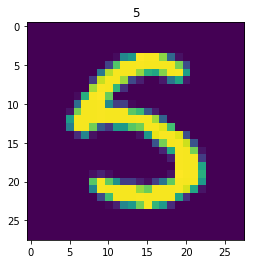

In [7]:
plot_digit(X_train[3], y_train[3])

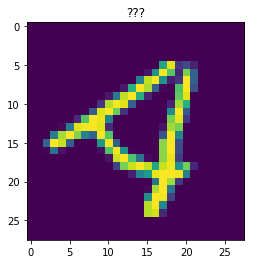

In [40]:
plot_digit(X_test[3], '???')

In [57]:
y_test_1hot[:10]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.]])

In [9]:
# convert class vectors to binary class matrices
y_train_1hot = np_utils.to_categorical(y_train, 10)
y_test_1hot = np_utils.to_categorical(y_test, 10)

model = Sequential()
model.add(Dense(64, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 64)            50240       dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 64)            0           dense_1[0][0]                    
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 64)            0           activation_1[0][0]               
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 10)            650         dropout_1[0][0]                  
___________________________________________________________________________________________

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train_1hot,
                    batch_size=64, nb_epoch=5,
                    verbose=1, validation_data=(X_test, y_test_1hot))
score = model.evaluate(X_test, y_test_1hot, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 31500 samples, validate on 10500 samples
Epoch 1/5
31500/31500 [==============================] - 1s - loss: 7.5498 - acc: 0.5221 - val_loss: 5.9670 - val_acc: 0.6221

In [13]:
def predict_labels(input_data):
    labels_predicted = model.predict(X_test, batch_size=32, verbose=0)
    predicted = pd.DataFrame(labels_predicted)
    predicted = predicted.idxmax(1)
    return(predicted.values)

In [20]:
y_test_predicted = [str(p) for p in predict_labels(X_test)]

In [51]:
print(len(y_test))
print(len(y_test_predicted))

print(y_test[:20])
print(y_test_predicted[:20])

10500
10500
['7', '3', '7', '4', '4', '2', '8', '5', '2', '6', '2', '2', '3', '6', '9', '3', '0', '1', '3', '0']
['7', '3', '7', '9', '4', '2', '8', '5', '2', '6', '2', '2', '3', '6', '9', '3', '5', '1', '3', '6']


[[   0    0   42   98    5  805  106    6   19    7]
 [   0 1098   13    7    0   15    5    3    6    4]
 [   0    2  948   28   14    9   20   13    8    4]
 [   0    0   33  955    0   46    8   15   28   14]
 [   0    2    8    1  886    2   14    1    5   76]
 [   0    2    3   25    7  873   16    0   12   10]
 [   0    4    3    0   10   17  953    0    0    0]
 [   0    3   39    7   23    8    2  983    3   50]
 [   0    6   16   23    5   61   26    5  850   27]
 [   0    3    4   22   24   20    1   18    7  950]]


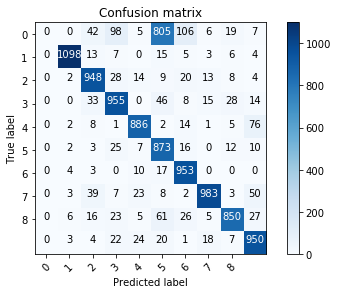

In [52]:
cm = confusion_matrix(y_test, y_test_predicted)
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    (This function is copied from the scikit docs.)
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(cm, range(9))

In [49]:
pd.Series(y_test_predicted).value_counts()

5    1856
3    1166
6    1151
9    1142
1    1120
2    1109
7    1044
4     974
8     938
dtype: int64

In [56]:
confusion = pd.DataFrame({'predicted':y_test_predicted, 'actual':y_test})
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_test_predicted, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print(df_confusion)

print(confusion.loc[confusion['actual']=='1'])
print(confusion.shape)

Predicted     1    2    3    4    5    6    7    8    9
Actual                                                 
0             0   42   98    5  805  106    6   19    7
1          1098   13    7    0   15    5    3    6    4
2             2  948   28   14    9   20   13    8    4
3             0   33  955    0   46    8   15   28   14
4             2    8    1  886    2   14    1    5   76
5             2    3   25    7  873   16    0   12   10
6             4    3    0   10   17  953    0    0    0
7             3   39    7   23    8    2  983    3   50
8             6   16   23    5   61   26    5  850   27
9             3    4   22   24   20    1   18    7  950
      actual predicted
17         1         1
23         1         1
28         1         1
37         1         1
38         1         1
40         1         1
75         1         1
78         1         1
103        1         1
106        1         1
114        1         1
118        1         1
120        1         1
135   

In [49]:
def read_test(filename):
    with open(filename) as f:
        lines = f.readlines()
    digits = [[int(d) for d in line.split(',')] for line in lines[1:]]
    return digits
digits_test = read_test('data/digits/test.csv')

submission = pd.DataFrame({'ImageId':range(1,28001), 'Label':predict_labels(digits_test)})
submission.to_csv('submissions/digits/submission_3.csv', index=False)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,4
3,4,7
4,5,3
